Shivali Chandra <br>
Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [27]:
%matplotlib inline
import brfss
import thinkstats2
import seaborn
import numpy as np
import matplotlib.pyplot as plt

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [28]:
df = brfss.ReadBrfss()
df = df.dropna(subset=['wtkg2', 'htm3'])
df

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185
5,42,1,118.181818,415.161314,109.09,183
6,40,2,50.000000,422.810541,50.00,157
7,24,2,131.818182,1280.585980,122.73,178
8,37,1,87.727273,1245.060440,90.00,178
9,65,1,77.272727,382.738158,77.27,173
10,28,1,52.272727,3131.561570,63.64,170


linear least fit:  2.28665216293 0.0121609976398


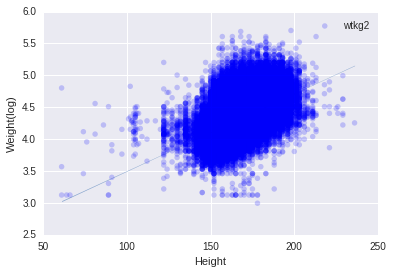

In [30]:
height = df.htm3
weight = np.log(df.wtkg2)
inter, slope = thinkstats2.LeastSquares(height, weight)
print 'linear least fit: ', inter, slope

def SamplingDistribution(live, iters=101):
    t = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRows(live)
        heights = sample.htm3
        weights = np.log(sample.wtkg2)
        estimates = thinkstats2.LeastSquares(heights, weights)
        t.append(estimates)
    inters, slopes = zip(*t)
    return inters, slopes

inters, slopes = SamplingDistribution(df)

def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = thinkstats2.FitLine(xs, inter, slope)
        fys_seq.append(fys)
        
    p = (100 - percent) / 2
    percents = p, 100-p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs,low,high,**options)

PlotConfidenceIntervals(height, inters, slopes)
thinkplot.Scatter(height, weight)
thinkplot.Show(xlabel='Height', ylabel='Weight(log)')

Knowing height helps because it gives a basic range of possible weights (especially the range of healthy and unhealthy weights). 

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

I don't entirely understand the purpose of the residual for the least squares and why we're taking a log in the above problem, so it would be helpful to go over it in class - the reading didn't really help me understand it too well. 

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.

- 